In [2]:
import pandas as pd
DATA_PATH = r'/home/rraiyan/simulations/tfo_sim/data/compiled_intensity/weitai_data.pkl'
df = pd.read_pickle(DATA_PATH)
df.head()

,Wave Int,SDD,Uterus Thickness,Maternal Wall Thickness,Maternal Hb Concentration,Maternal Saturation,Fetal Hb Concentration,Fetal Saturation,Intensity
0,2.0,10,5.0,14.0,11.0,0.92,15.0,0.2,1.898178e+06
1,2.0,15,5.0,14.0,11.0,0.92,15.0,0.2,2.057866e+05
2,2.0,19,5.0,14.0,11.0,0.92,15.0,0.2,3.725366e+04
3,2.0,24,5.0,14.0,11.0,0.92,15.0,0.2,5.050863e+03
4,2.0,28,5.0,14.0,11.0,0.92,15.0,0.2,8.644937e+02


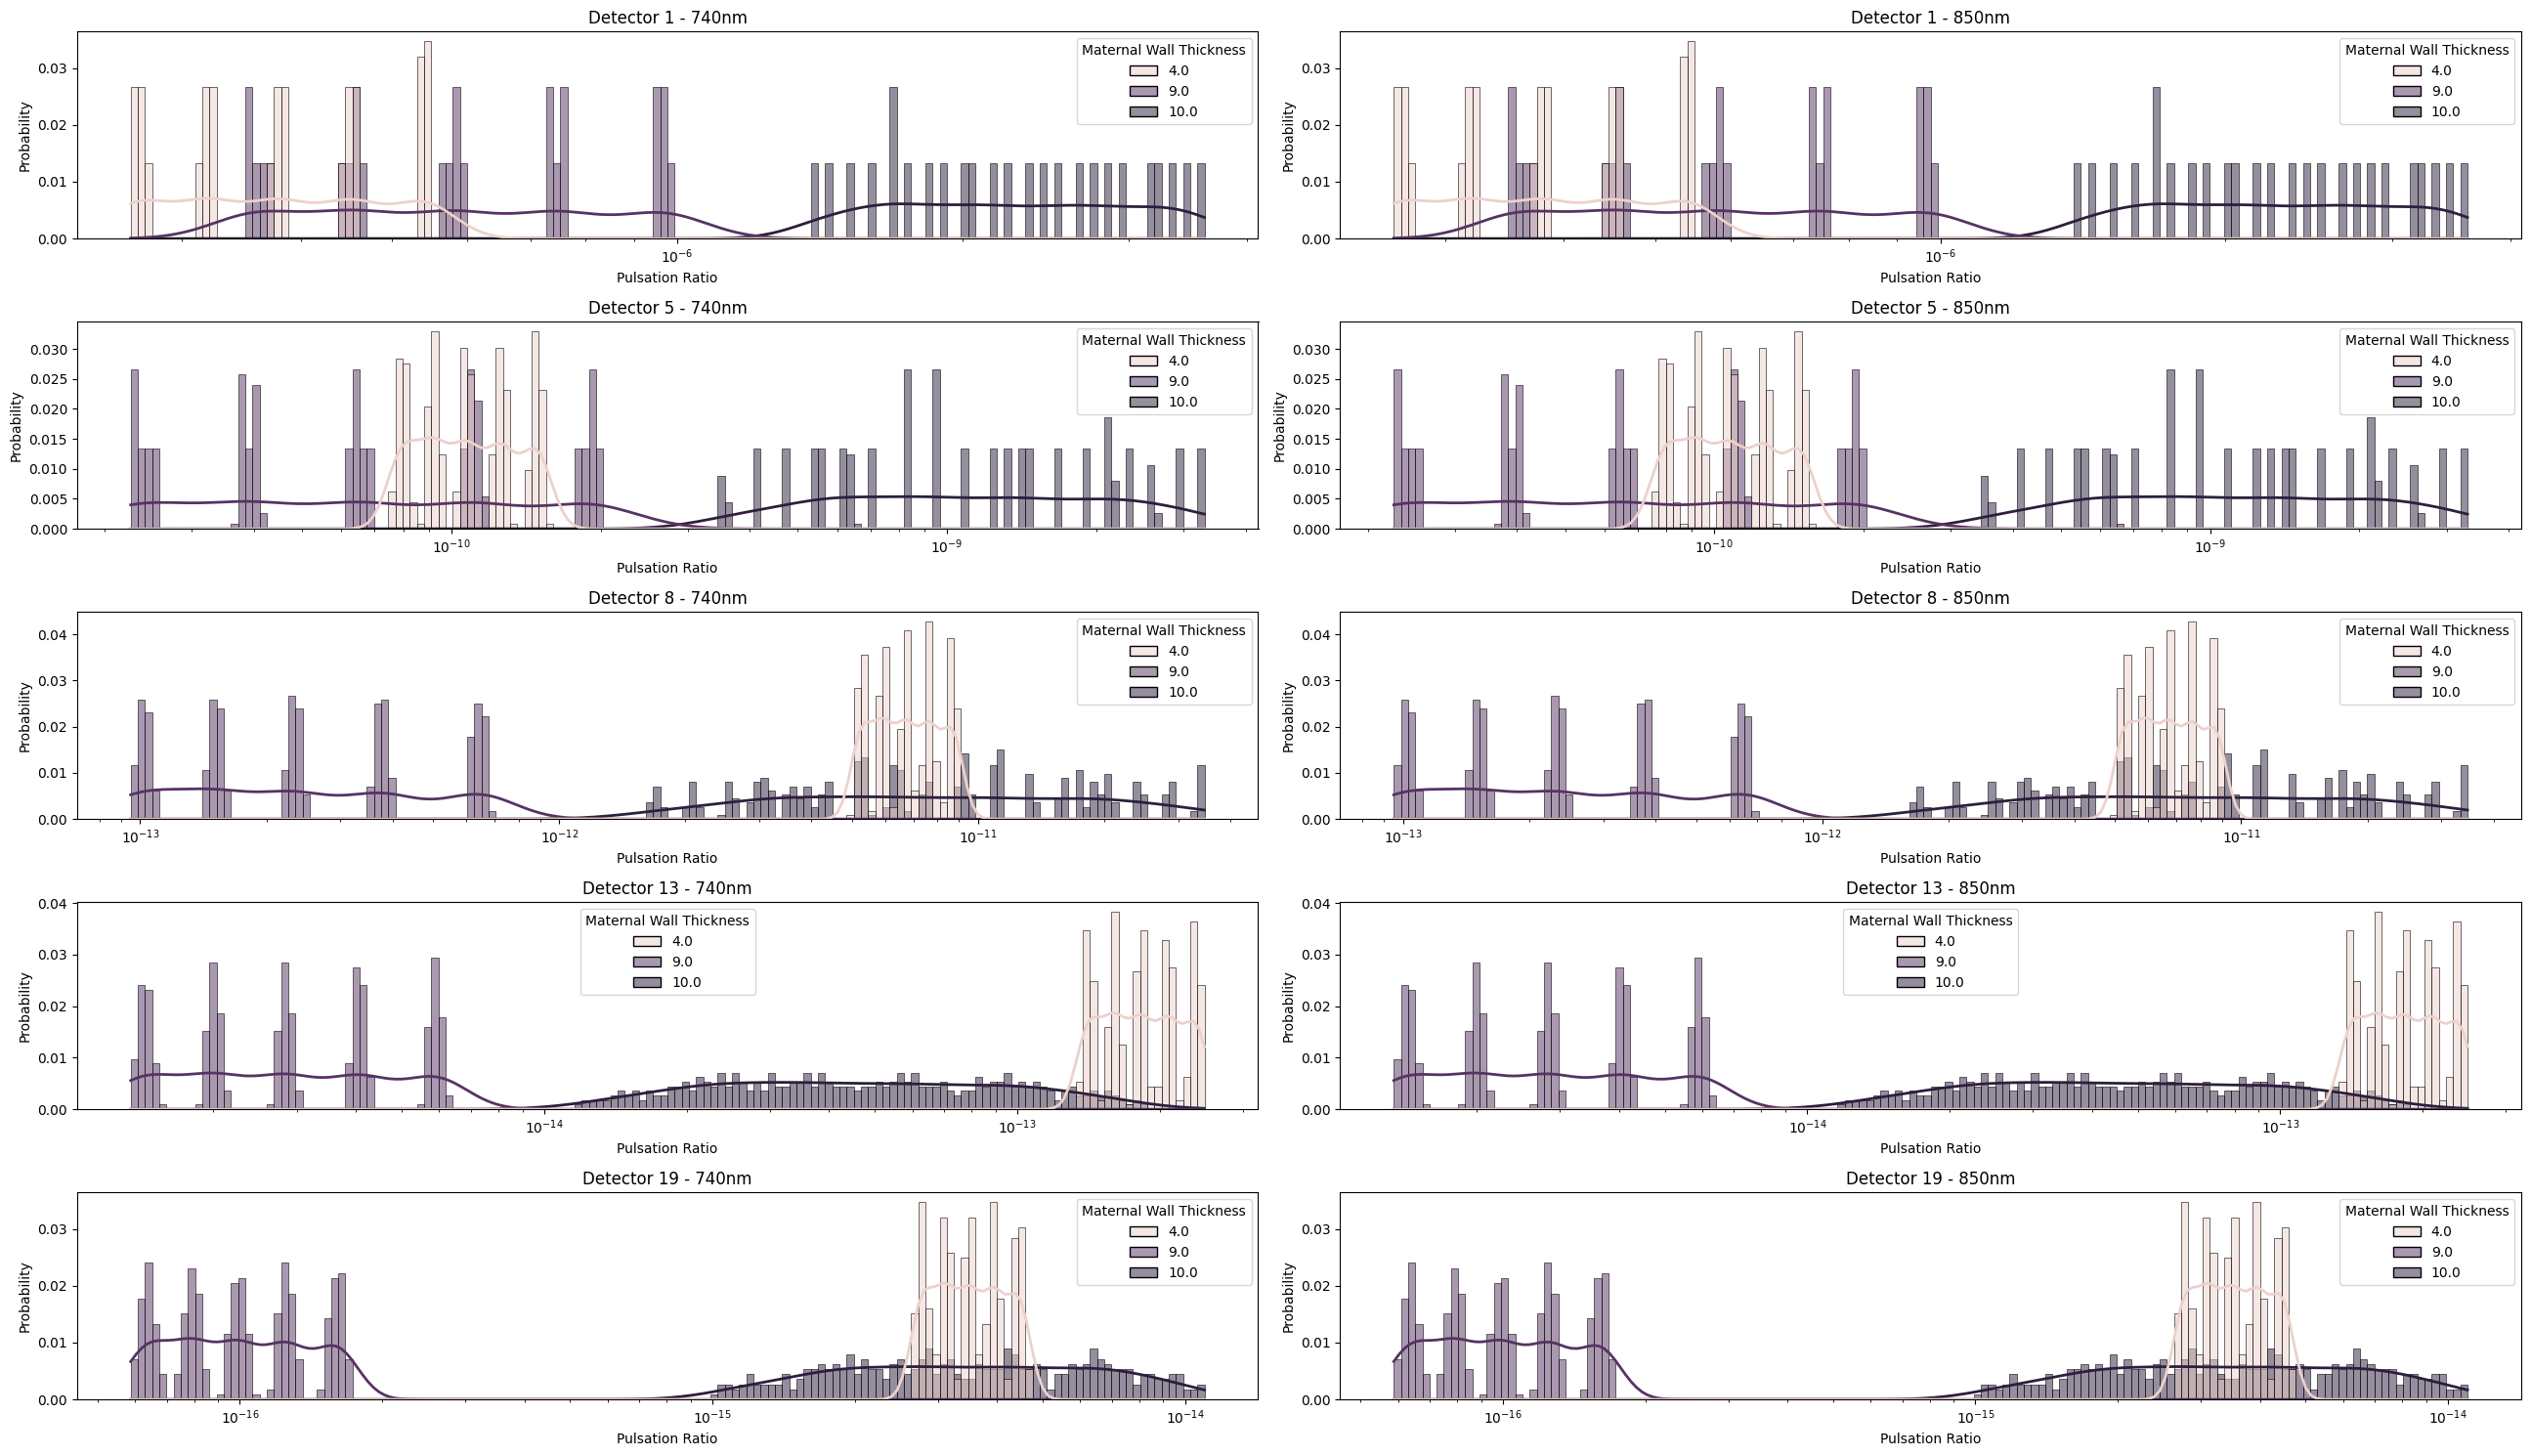

In [18]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#DATA_PATH = r'/home/rraiyan/personal_projects/tfo_inverse_modelling/data/processed_data/processed1_min_long_range.pkl'
#DATA_PATH = r'/home/rlfowler/Documents/research/tfo_inverse_modelling/Randalls Folder/data/rishad_data_ACDC.pkl'
#DATA_PATH = r'/home/rlfowler/Documents/research/tfo_inverse_modelling/Randalls Folder/data/rishad_data_intensities.pkl'
DATA_PATH = r'/home/rlfowler/Documents/research/tfo_inverse_modelling/Randalls Folder/data/rishad_data_intensities.pkl'
DATA_PATH = r'/home/rlfowler/Documents/research/tfo_inverse_modelling/Randalls Folder/data/weitai_data_intensities.pkl'

df = pd.read_pickle(DATA_PATH)
df.iloc[:, 7:] = df.iloc[:, 7:].abs()


def plot_distribution(df, detectors, columns):
    # Set the number of rows based on the number of detectors
    nrows = len(detectors)

    # Create a figure with subplots
    fig, axes = plt.subplots(nrows=nrows, ncols=2, figsize=(26, 3 * nrows))

    # Loop through each detector and plot the distribution for each wavelength
    for i, detector in enumerate(detectors):
        # Wavelength 1
        sns.histplot(df, x=columns[detector], hue='Maternal Wall Thickness', stat='probability', line_kws={'color': 'crimson', 'lw': 2}, log_scale=True, bins=150, kde=True, ax=axes[i, 0])
        axes[i, 0].set_title(f'Detector {detector} - 740nm')
        axes[i, 0].set_xlabel('Pulsation Ratio')

        # Wavelength 2
        sns.histplot(df, x=columns[detector], hue='Maternal Wall Thickness', stat='probability', line_kws={'color': 'crimson', 'lw': 2}, log_scale=True, bins=150, kde=True, ax=axes[i, 1])
        axes[i, 1].set_title(f'Detector {detector} - 850nm')
        axes[i, 1].set_xlabel('Pulsation Ratio')

    # Adjust layout
    plt.tight_layout()
    plt.show()

columns = df.columns[5:]
detectors = [1, 5, 8, 13, 19]  # Specify the detectors you want to plot , 5, 8, 13, 19
df1 = df[(df['Maternal Wall Thickness'] == 3) | (df['Maternal Wall Thickness'] == 4) | (df['Maternal Wall Thickness'] == 9) | (df['Maternal Wall Thickness'] == 10)]
plot_distribution(df1, detectors, columns)


In [14]:
print(df.columns)
print(df['Maternal Wall Thickness'].value_counts())

Index(['Maternal Wall Thickness', 'Maternal Hb Concentration',
       'Maternal Saturation', 'Fetal Hb Concentration', 'Fetal Saturation',
       '10_2.0', '15_2.0', '19_2.0', '24_2.0', '28_2.0', '33_2.0', '37_2.0',
       '41_2.0', '46_2.0', '50_2.0', '55_2.0', '59_2.0', '64_2.0', '68_2.0',
       '72_2.0', '77_2.0', '81_2.0', '86_2.0', '90_2.0', '94_2.0', '10_1.0',
       '15_1.0', '19_1.0', '24_1.0', '28_1.0', '33_1.0', '37_1.0', '41_1.0',
       '46_1.0', '50_1.0', '55_1.0', '59_1.0', '64_1.0', '68_1.0', '72_1.0',
       '77_1.0', '81_1.0', '86_1.0', '90_1.0', '94_1.0'],
      dtype='object')
4.0     62208
6.0     62208
8.0     62208
10.0    62208
12.0    62208
14.0    62208
16.0    62208
18.0    62208
Name: Maternal Wall Thickness, dtype: int64


In [41]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

#DATA_PATH = r'/home/rlfowler/Documents/research/tfo_inverse_modelling/Randalls Folder/data/rishad_data_intensities.pkl'
DATA_PATH = r'/home/rlfowler/Documents/research/tfo_inverse_modelling/Randalls Folder/data/randall_data_intensities_20of100.pkl'

df = pd.read_pickle(DATA_PATH)
df.iloc[:, 7:] = df.iloc[:, 7:].abs()

print(np.unique(df["Fetal Radius"].values))
print(np.unique(df["Fetal Displacement"].values))

[ 50.  70.  90. 110. 130. 150. 170. 190. 230. 250. 270. 290. 310. 330.
 350. 370. 390. 410. 430. 450. 470. 490.]
[ 0.  5. 10. 15. 20. 25. 30. 35. 40.]


In [43]:
print(df.columns)

Index(['Maternal Wall Thickness', 'Fetal Radius', 'Fetal Displacement',
       'Maternal Hb Concentration', 'Maternal Saturation',
       'Fetal Hb Concentration', 'Fetal Saturation', '10_1.0', '15_1.0',
       '19_1.0', '24_1.0', '28_1.0', '33_1.0', '37_1.0', '41_1.0', '46_1.0',
       '50_1.0', '55_1.0', '59_1.0', '64_1.0', '68_1.0', '72_1.0', '77_1.0',
       '81_1.0', '86_1.0', '90_1.0', '94_1.0', '10_2.0', '15_2.0', '19_2.0',
       '24_2.0', '28_2.0', '33_2.0', '37_2.0', '41_2.0', '46_2.0', '50_2.0',
       '55_2.0', '59_2.0', '64_2.0', '68_2.0', '72_2.0', '77_2.0', '81_2.0',
       '86_2.0', '90_2.0', '94_2.0'],
      dtype='object')


In [40]:
#df1 = df.where(df["Fetal Displacement"] == 0).dropna()
df1 = df[df["Fetal Displacement"] == 0].dropna()
loc = (df1["Fetal Radius"] == 290.0) | (df1["Fetal Radius"] == 250.0)
df2 = df1[loc]
df3 = df2[df2["Maternal Wall Thickness"] == 9.0]

# print(df.columns)
for col in df2.columns[:7]:
    print(col, df2[col].value_counts())

Maternal Wall Thickness 3.0     43923
4.0     43923
9.0     43923
10.0    43923
Name: Maternal Wall Thickness, dtype: int64
Fetal Radius 290.0    87846
250.0    87846
Name: Fetal Radius, dtype: int64
Fetal Displacement 0.0    175692
Name: Fetal Displacement, dtype: int64
Maternal Hb Concentration 11.0    15972
11.5    15972
12.0    15972
12.5    15972
13.0    15972
13.5    15972
14.0    15972
14.5    15972
15.0    15972
15.5    15972
16.0    15972
Name: Maternal Hb Concentration, dtype: int64
Maternal Saturation 0.90    15972
0.91    15972
0.92    15972
0.93    15972
0.94    15972
0.95    15972
0.96    15972
0.97    15972
0.98    15972
0.99    15972
1.00    15972
Name: Maternal Saturation, dtype: int64
Fetal Hb Concentration 10.7250    5324
13.6500    5324
16.0000    5324
15.8875    5324
15.6000    5324
15.5000    5324
15.3750    5324
15.1125    5324
15.0000    5324
14.8625    5324
14.6250    5324
14.5000    5324
14.3500    5324
14.1375    5324
14.0000    5324
13.8375    5324
13.5000  

In [7]:
print(len(df))
print(len(df.where(df["Fetal Radius"] == 50).dropna()))
print(len(df.where(df["Fetal Radius"] == 70).dropna()))
print(len(df.where(df["Fetal Displacement"] == 0).dropna()))

3030687
175692
175692
439230


In [47]:
columns = df.columns[7:]
print(columns[1])

15_1.0


In [5]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#DATA_PATH = r'/home/rlfowler/Documents/research/tfo_inverse_modelling/Randalls Folder/data/rishad_data_intensities.pkl'
DATA_PATH = r'/home/rlfowler/Documents/research/tfo_inverse_modelling/Randalls Folder/data/randall_data_intensities.pkl'

df = pd.read_pickle(DATA_PATH)
df.iloc[:, 7:] = df.iloc[:, 7:].abs()

In [2]:

def plot_distribution(df, detectors, columns):
    # Set the number of rows based on the number of detectors
    nrows = len(detectors)

    # Set the color palette
    #sns.set_palette('husl') #Not working

    # Create a figure with subplots
    fig, axes = plt.subplots(nrows=nrows, ncols=2, figsize=(26, 3 * nrows))

    # Loop through each detector and plot the distribution for each wavelength
    for i, detector in enumerate(detectors):
        # Wavelength 1
        #sns.histplot(df, x=columns[detector], hue='Fetal Radius', stat='probability', log_scale=True, bins=150, kde=True, ax=axes[i, 0])
        sns.histplot(df, x=columns[detector], hue='Fetal Radius', stat='probability', log_scale=True, bins=150, kde=True, ax=axes[i, 0], palette='husl')
        axes[i, 0].set_title(f'Detector {detector} - 740nm')
        axes[i, 0].set_xlabel('Pulsation Ratio')

        # Wavelength 2
        #sns.histplot(df, x=columns[detector + 20], hue='Fetal Radius', stat='probability', log_scale=True, bins=150, kde=True, ax=axes[i, 1])
        sns.histplot(df, x=columns[detector + 20], hue='Fetal Radius', stat='probability', log_scale=True, bins=150, kde=True, ax=axes[i, 1], palette='husl')
        axes[i, 1].set_title(f'Detector {detector} - 850nm')
        axes[i, 1].set_xlabel('Pulsation Ratio')

    # Adjust layout
    plt.tight_layout()
    plt.show()

columns = df.columns[7:]
detectors = [1, 5, 8, 13, 19]  # Specify the detectors you want to plot , 5, 8, 13, 19
#plot_distribution(df, detectors, columns)
plot_distribution(df.where(df["Fetal Displacement"] == 0).dropna(), detectors, columns)


KeyboardInterrupt: 

In [6]:
print(np.unique(df["Fetal Radius"].values))

[ 50.  70.  90. 110. 130. 150. 170. 190. 210. 230. 250. 270. 290. 310.
 330. 350. 370. 390. 410. 430. 450. 470. 490.]


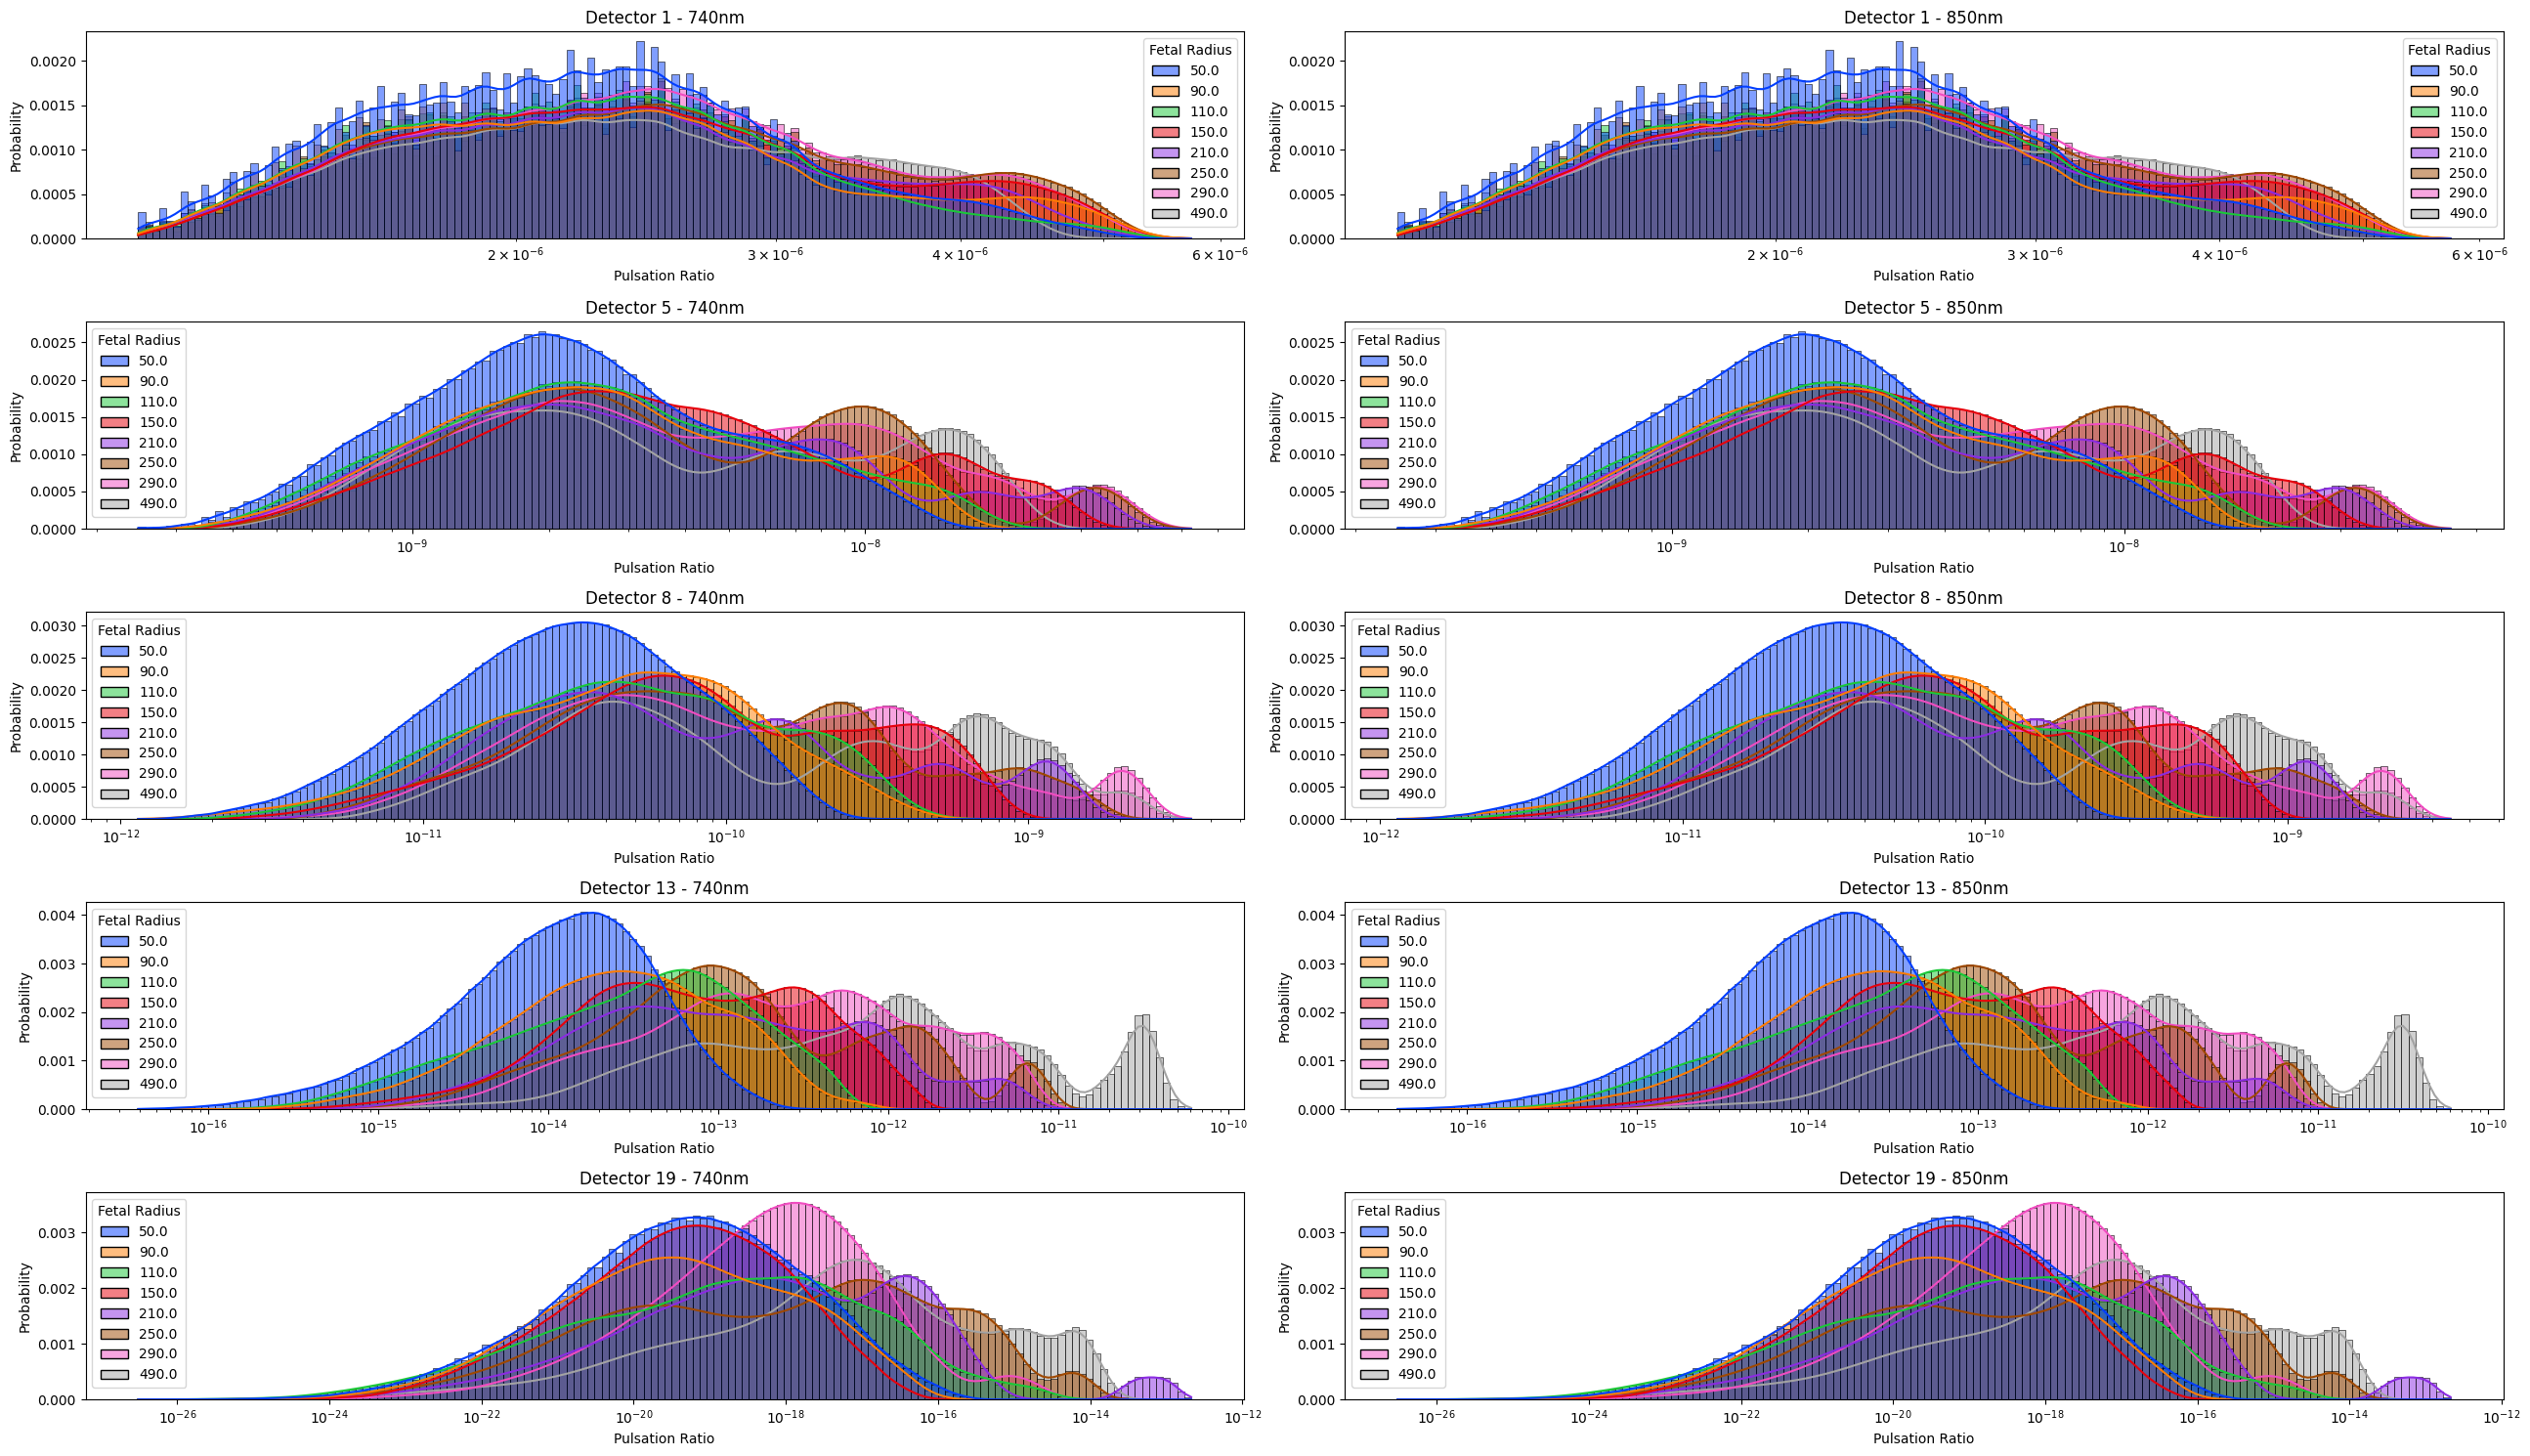

In [8]:

def plot_distribution(df, detectors, columns):
    # Set the number of rows based on the number of detectors
    nrows = len(detectors)

    # Create a figure with subplots
    fig, axes = plt.subplots(nrows=nrows, ncols=2, figsize=(26, 3 * nrows))

    # Loop through each detector and plot the distribution for each wavelength
    for i, detector in enumerate(detectors):
        # Wavelength 1
        #sns.histplot(df, x=columns[detector], hue='Maternal Wall Thickness', stat='probability', log_scale=True, bins=150, kde=True, ax=axes[i, 0], palette="bright")#palette='husl')
        sns.histplot(df, x=columns[detector], hue='Fetal Radius', stat='probability', log_scale=True, bins=150, kde=True, ax=axes[i, 0], palette="bright")#palette='husl')
        axes[i, 0].set_title(f'Detector {detector} - 740nm')
        axes[i, 0].set_xlabel('Pulsation Ratio')

        # Wavelength 2
        #sns.histplot(df, x=columns[detector], hue='Maternal Wall Thickness', stat='probability', log_scale=True, bins=150, kde=True, ax=axes[i, 1], palette="bright")#palette='husl')
        sns.histplot(df, x=columns[detector], hue='Fetal Radius', stat='probability', log_scale=True, bins=150, kde=True, ax=axes[i, 1], palette="bright")#palette='husl')
        axes[i, 1].set_title(f'Detector {detector} - 850nm')
        axes[i, 1].set_xlabel('Pulsation Ratio')

    # Adjust layout
    plt.tight_layout()
    plt.show()


# df1 = df.where(df["Fetal Displacement"] == 0).dropna()
# df2 = df1[(df1["Fetal Radius"] == 250.0)]# | (df1["Fetal Radius"] == 290.0)]
df2 = df[(df["Fetal Radius"] == 50) | (df["Fetal Radius"] == 90) | (df["Fetal Radius"] == 110) | (df["Fetal Radius"] == 150) | (df["Fetal Radius"] == 210) | (df["Fetal Radius"] == 250) | (df["Fetal Radius"] == 290) | (df["Fetal Radius"] == 490)]

columns = df.columns[7:]
detectors = [1, 5, 8, 13, 19]  # Specify the detectors you want to plot , 5, 8, 13, 19
plot_distribution(df2, detectors, columns)